In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Загружаем даные для анализа
df = pd.read_csv('data2.csv', sep=';', decimal=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      249 non-null    int64  
 1   x2      249 non-null    int64  
 2   x3      249 non-null    int64  
 3   y1      249 non-null    float64
 4   y2      249 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.9 KB


,x1,x2,x3,y1,y2
0,2,0,2,0.2,11.0
1,3,-21,3,0.3,-30.5
2,4,0,4,0.4,12.0
3,15,-30,5,0.5,-42.5
4,18,12,6,0.6,43.0


<AxesSubplot:xlabel='x3', ylabel='y1'>

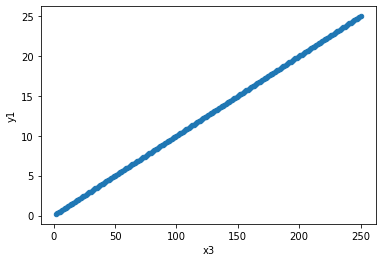

In [3]:
df.plot(kind='scatter', x='x3', y='y1')

<AxesSubplot:xlabel='x1', ylabel='y2'>

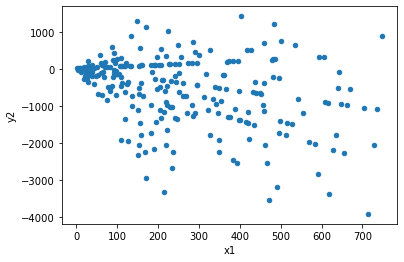

In [4]:
df.plot(kind='scatter', x='x1', y='y2')

<AxesSubplot:xlabel='x2', ylabel='y2'>

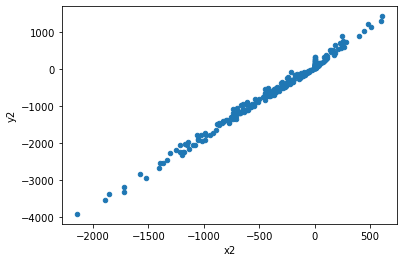

In [5]:
df.plot(kind='scatter', x='x2', y='y2')

## Коэффициент корреляции Пирсона

In [6]:
# Коэффициент корреляции Пирсона (r-Пирсона) применяется для исследования взаимосвязи двух переменных, измеренных в метрических шкалах на одной и той же выборке. Он позволяет определить, насколько пропорциональная изменчивость двух переменных.

In [7]:
df[['x2', 'y2']].corr()

,x2,y2
x2,1.000000,0.995926
y2,0.995926,1.000000


## Коэффициент ранговой корреляции Спирмена

In [8]:
# Непараметрический метод, который используется с целью статистического изучения связи между явлениями. В этом случае определяется фактическая степень параллелизма между двумя количественными рядами изучаемых признаков и дается оценка тесноты установленной связи с помощью количественно выраженного коэффициента.

In [9]:
df[['x2', 'y2']].corr(method='spearman')

,x2,y2
x2,1.00000,0.98996
y2,0.98996,1.00000


## Линейная регрессия

In [10]:
X = df[['x1','x2']]
y = df['y2']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
print(X_train.shape)
print(y_train.shape)

(199, 2)
(199,)


In [13]:
print(X_test.shape)
print(y_test.shape)

(50, 2)
(50,)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(model.coef_, model.intercept_)

[0.5 2. ] 9.999999999999886


In [16]:
y_pred = model.predict(X_test)
y_pred

array([ -710. ,  -729.5,    45. , -1180. ,  -650. ,  -539. , -1889. ,
        -471. ,  -692. ,   881.5, -1140. ,  -237. ,  -959. , -1122.5,
       -2037.5,   424. ,  -902.5,    20.5,  -372.5,  -120. ,  -100.5,
       -1342. , -1047.5,   150. ,  -746.5,  1276.5,  -127.5,  -137. ,
         697. ,   202. ,    86.5,  -126.5, -2947.5, -1321. , -1655. ,
        -989. , -1445. ,  -665. ,    77.5,  -978. ,    43. ,  -269. ,
        1417. , -1722.5,   881. ,   307. ,   106. ,  -597.5,  -903.5,
         360. ])

### Коэффициент детерминации

In [17]:
# Это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной.

In [18]:
r2_score(y_test, y_pred)

1.0

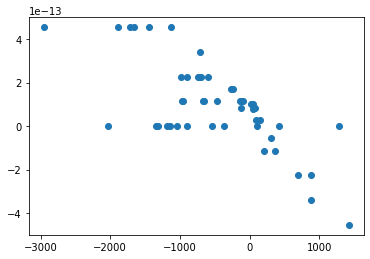

In [19]:
plt.scatter(y_pred,  y_test - y_pred)